<a href="https://colab.research.google.com/github/bobg207/BulldogCompSci/blob/master/pandas_weather_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount the drive

The path to drive is '/content/drive'

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Display the contents of the folder where the data exists

Use `!ls` followed by the path to the folder containg the data file.  Be sure to escape `\` any special characters, like spaces, that might be part of a folder name. The path to the folder begins with the path used above and ends with `/*.txt`. This will display all (`*`) files, with extension `.txt` that are in the location provided by the path.

ex: `!ls content/drive/My\ Drive/ColabNBs/*.txt`

Notice the escaped space between "My" and "Drive".  Also when doing this the path is NOT in quotes, the language here is not Python but Command Line and as such does not require the path to be a string.

In [2]:
# !ls /content/drive/My\ Drive/Colab\ Notebooks/*.txt

# Create a convert_temp function

The temperatures, in the data, are in degrees Celsius and mulitplied by 10 so there are no decimals in the data.  Create a function to convert a given temp to a temp in degrees Fahrenheit, rounded to one decimal place.



In [3]:
def temp_convert(temp):
    convert_decimal = int(temp)/10
    convert_temp = round(convert_decimal* (9/5) +32, 1)
    return convert_temp


# Read the data from the file

Create the path (should be the one use above, with the specific file that you will read from).

Use this path to read the dat from the file.  Decide how you will do this and what format would you like the data returned as.

Spend some time looking at the data and deciding how you will "clean" the data.  

1.   Which columns of data are of interest and wich will be ignored
2.   What are the data types currently and what do you want them to be
3.   What data do you want and how will you store the data you choose
4.   How will you convert the data that needs changing
5.   Is there any missing or unusual data? How will you handle this?
6.   Other?

In [4]:
# path = '/content/drive/My Drive/Colab Notebooks/PortlandWeather2013b.txt'

# with open(path) as file:
#     data_list = file.readlines()

# data_list
path = '../input/portland-weather/PortlandWeather2013b.txt'

with open(path) as f:
    file = f.readlines()
    


# Create a Python dictionary with the weather data

Copy/Paste your code from the previous NB

In [5]:
dict = {"date":[], "min_temp":[], "max_temp":[]}
the_list = []
    
for num in range(2):
    file.pop(0)

for item in file:
    item_list = item.split()
    the_list.append(item_list)
    
for i in range(len(the_list)) :
    min_cel = int(the_list[i][6])
    min = temp_convert(min_cel)
    
    max_cel = int(the_list[i][5])
    max = temp_convert(max_cel)
    
    dict["date"].append(the_list[i][1])
    dict["min_temp"].append(min)
    dict["max_temp"].append(max)

# Pandas

## Create a Dataframe using the weather dictionary

In [6]:
# create a pandas df
import pandas as pd
data_df = pd.DataFrame(dict)
data_df

,date,min_temp,max_temp
0,20130101,10.9,32.0
1,20130102,3.0,24.1
2,20130103,-0.0,23.0
3,20130104,9.0,34.0
4,20130105,16.0,36.0
...,...,...,...
360,20131227,7.2,32.0
361,20131228,18.1,37.0
362,20131229,20.1,35.1
363,20131230,8.2,35.1


## Display the first 5 and last 5 rows

In [7]:
print(data_df.head())
print(data_df[5:8])
print(data_df.tail())


       date  min_temp  max_temp
0  20130101      10.9      32.0
1  20130102       3.0      24.1
2  20130103      -0.0      23.0
3  20130104       9.0      34.0
4  20130105      16.0      36.0
       date  min_temp  max_temp
5  20130106      16.0      37.0
6  20130107      15.1      30.9
7  20130108      12.9      43.0
         date  min_temp  max_temp
360  20131227       7.2      32.0
361  20131228      18.1      37.0
362  20131229      20.1      35.1
363  20131230       8.2      35.1
364  20131231       1.2      13.1


## Display a summary of basic information about your df, in two ways

In [8]:
# df.info() and df.describe()
print(data_df.info())
print()
print(data_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      365 non-null    object 
 1   min_temp  365 non-null    float64
 2   max_temp  365 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB
None

         min_temp    max_temp
count  365.000000  365.000000
mean    38.138904   55.941644
std     17.374042   18.882167
min     -5.800000    8.100000
25%     26.200000   39.900000
50%     37.000000   57.000000
75%     52.000000   71.100000
max     73.000000   95.000000


## Display the first 3 rows of the max temps columns using 2 different methods. Assign each to a different variable and use print( ) to display.

In [9]:
# df.iloc[[rowstart:rowstop], [col1]] for integer selection; 
# stop is exclusive due to zero indexing
# df.loc[[rowstart:rowstop], [col1]] for label selection; 
# stop is inclusive

ex1 = data_df.loc[:2,["max_temp"]]
ex2 = data_df.iloc[:3,2]
print(ex1)
print()
print(ex2)

   max_temp
0      32.0
1      24.1
2      23.0

0    32.0
1    24.1
2    23.0
Name: max_temp, dtype: float64


## ## Display the rows 10, 100, 200, and 365 of the date and min temps columns using 2 different methods. Assign each to a different variable and use print( ) to display.

In [10]:
# df.iloc[[row1, row2, ...], [col1, col2, ...]] for integer selection; 
# stop is exclusive due to zero indexing
# df.loc[[row1, row2, ...], [col1, col2, ...]] for label selection; 
# stop is inclusive

examp1 = data_df.loc[[10,100,200,364], ["date", "min_temp"]]
examp2 = data_df.iloc[[10,100,200,364], [0,1]]

print(examp1)
print()
print(examp2)

         date  min_temp
10   20130111      19.0
100  20130411      39.9
200  20130720      70.0
364  20131231       1.2

         date  min_temp
10   20130111      19.0
100  20130411      39.9
200  20130720      70.0
364  20131231       1.2


## Select only the rows where the max temps are greater than 90. Assign this to a variable

In [11]:
# df.loc[df[col] condition]
greater_than_90 = data_df.loc[data_df["max_temp"]>90]
print(greater_than_90)

         date  min_temp  max_temp
150  20130531      57.9      91.9
174  20130624      66.9      91.9
175  20130625      69.1      91.0
185  20130705      73.0      93.0
195  20130715      70.0      91.0
199  20130719      69.1      95.0
200  20130720      70.0      91.0
253  20130911      61.0      93.0


## Using the dataframe (assigned to a variable) from the previous cell, get just the dates where the temperature was greater than 90.  Convert to a Python list.

In [12]:
# df[col]
great_90 = data_df[data_df["max_temp"]>90]

## Convert to a Python list

In [13]:
# df.tolist()
great_90.values.tolist()

[['20130531', 57.9, 91.9],
 ['20130624', 66.9, 91.9],
 ['20130625', 69.1, 91.0],
 ['20130705', 73.0, 93.0],
 ['20130715', 70.0, 91.0],
 ['20130719', 69.1, 95.0],
 ['20130720', 70.0, 91.0],
 ['20130911', 61.0, 93.0]]

# Plot Weather Data

Plot the days of the year where the minimum temperature greater than 40 degrees.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

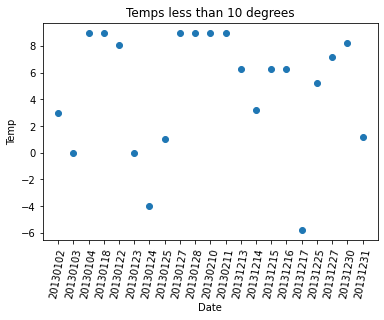

In [14]:
import matplotlib.pyplot as plt
tempers = []
dates = []
vals = data_df[data_df["min_temp"]<10]
vals_list = vals.values.tolist()
for item in vals_list:
    dates.append(item[0])
    tempers.append(item[1])
    
plt.scatter(dates, tempers)
plt.xlabel("Date")
plt.ylabel("Temp")
plt.title("Temps less than 10 degrees")
plt.xticks(rotation=80)
